# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a href="#intro"></a>
## Introduction
    
The FBI gun dataset consists of two parts:
<li> the information about the checks in FBI's National Instant Criminal Background Check System (NICS) made by each gun seller have to make before they will sell a gun to ensure potential buyer hasn't have criminal past</li>
<li> the second part is the results of the census in each state of the USA.</li>

The data are provided with two different files:
<li>the Excel file (.xlsx) with the number of firearm checks, which was first opened in Google Sheets and then export as csv file to allow easy import into the Jupyter Notebook</li>
<li>the csv file with the census results, which can be directly imported to Jupyter Notebook.</li>
    
It will be worth to investigate:
<li> How the trends in purchasing guns have changed over time in the USA? Wheter the trend was decreasing or increasing?</li>
<li> Which states has the heighest rate of gun purchase? And which has the lowest rate of gun purchase?</li>
<li> Are there any parameters from the census data associated with the number of the gun purchases?</li>

More information about database can be found here:
<li>https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md</li>
<li>https://www.fbi.gov/file-repository/nics-participation-map.pdf/view</li>
<li>https://www.fbi.gov/file-repository/nics-firearms-licensee-manual-111811.pdf/view</li>

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [1]:
# First I import all neccessary Python libraries. Also those which I will use in further steps of the analysis. 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# This magic command will allow to display plots inside the Jupyter Notebook
%matplotlib inline

In [2]:
# Loading the first part of the data: number of firearm checks
gun_data = pd.read_csv('gun_data.csv')
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


At first glance, this data looks good. 
<br>What can be done here is just replacing the numric index by the month and then the month column can be deleted.
Please note that any changes (like cleaning the data) discused here will be implemented in the next section (<a href="#clean">Data Cleaning</a>).
<br>However, only first 5 rows was displayed. So, it need to further investigated.

In [3]:
# Checking how big is this data frame
gun_data.shape

(12485, 27)

This data frame has 12 485 rows and 27 column

In [4]:
# Checking the information about the columns
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
# Further investigate the type of month columns
type(gun_data['month'][0])

str

In [6]:
# Further investigate the type of state columns
type(gun_data['state'][0])

str

The first two columns (month and state) are of type string and this needn't have to be changed. Others columns (except multiple and totals, which are int) are of type float. So it will be good to change the type of those two columns from int to float, so all the numeric columns has the same type.
<br>There are some null values in this dataset. The null values appears in the columns with different types of firearm checks (columns from 2 to 25). Columns month, state and totals have no null values. In this case, null values appear in this dataset, most likely because there were no call into NICS in the given period due to the law in force at the time. Most probably, in that time so type of gun transaction needn't have to be checked in the system. So I decided not to do anything with those missing values. 

In [7]:
# Checking for duplicates
sum(gun_data.duplicated())

0

The function df.duplicated() return True or False valeus. So if the sum of those result will be 0, this means that there are no duplicated rows in the data. As it is in this case.

In [8]:
# Checking for how many states are data in the database
gun_data['state'].nunique()

55

In [9]:
# Checking the period from which the data are in the database
gun_data['month'].unique()

array(['2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04',
       '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10',
       '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04',
       '2016-03', '2016-02', '2016-01', '2015-12', '2015-11', '2015-10',
       '2015-09', '2015-08', '2015-07', '2015-06', '2015-05', '2015-04',
       '2015-03', '2015-02', '2015-01', '2014-12', '2014-11', '2014-10',
       '2014-09', '2014-08', '2014-07', '2014-06', '2014-05', '2014-04',
       '2014-03', '2014-02', '2014-01', '2013-12', '2013-11', '2013-10',
       '2013-09', '2013-08', '2013-07', '2013-06', '2013-05', '2013-04',
       '2013-03', '2013-02', '2013-01', '2012-12', '2012-11', '2012-10',
       '2012-09', '2012-08', '2012-07', '2012-06', '2012-05', '2012-04',
       '2012-03', '2012-02', '2012-01', '2011-12', '2011-11', '2011-10',
       '2011-09', '2011-08', '2011-07', '2011-06', '2011-05', '2011-04',
       '2011-03', '2011-02', '2011-01', '2010-12', 

The data are split by state and by month. The database has data from October 1998 to September 2017.

In [10]:
# Loading the second part of the data: the census results
census = pd.read_csv('US_Census_Data.csv')
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [11]:
# Checking how big is this data frame
census.shape

(85, 52)

This data frame has 85 rows and 52 columns.

In [12]:
# Checking the information about the columns
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

There are 52 columns in this dataset, where the first two columns are fact and fact note. "Fact Note" columns seems to be irrelevant in light of this analysis so it can be deleted from the dataset. 
<br>All the columns type matched so I decided not to change them as for now.
<br>The fact columns seem to have much more values than rest of the columns, so I would like to check the unique values stored in this column.

In [13]:
# Checking the values in fact column
census['Fact'].unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

The last 17 values seems to be a little bit suspicious for me so I would like to check the end rows of this data frame.

In [14]:
# Checking the end of the dataframe (last 25 rows)
census.tail(25)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The last 21 rows seems to be either some kind of notes or are NaN. So those 21 last rows can be deleted from data frame as well.
<br>
<br> As for the first dataframe I would replace the numeric index of rows with the fact columns. This will make the data frame more clear.
<br>
<br> Last to make the dataframe more clear to read and analyze I would transpose the data frame to swap columns and rows with each other.
<br>
<br>
After all of those changes this dataframe should have no missing values. However this will checked after applying all of those changes in the next subchapter. 
<br>
<br>
Lastly, it is worth to notice that there were 55 states in the gun data set and here it is only 50. According to Wikipedia (https://en.wikipedia.org/wiki/United_States) there are only 50 states in the USA. So the second dataframe seems to be ok in this context. So I would like to check what are those 5 additional states in the first dataframe.  

In [15]:
# Checking what are those 5 additional states in the first dataframe
states_1 = gun_data['state'].unique()
states_2 = census.columns.to_list()

# To check what is the difference between those two lists I iterate thought first one and if the element of the list isn't 
# present in the second one this element is added to the new list with results (diff)
diff = []
for element in states_1:
    if(element not in states_2):
        diff.append(element)
        
print(diff)

['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']


Those 5 additional states are District of Columbia and 4 unincorporated U.S. territory (according to Wikipedia.org). However, since the data about those territories aren't present in the second dataframe, so I have decided to delete the rows for these states from the first database.

<a id='clean'></a>
### Data Cleaning

Now it's time to apply all of the changes and cleaning described in prevoius section. 
<br>Here, you can find the brief list of all the changes which will be made to those two data frames (the reason behind those changes are alredy explained in the previoud chapter, this list aim to just summarize them to make the report more clear):
1. gun_data
- delete rows for 5 additional states ('District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands')
- change the type of the "multiple" column from int to float
- change the type of the "totals" column from int to float
- replace the numeric rows index with month and then delete month column

2. census
- delete "Fact Note" column
- delete last 21 columns of the dataframe
- replace the numeric row index the "fact" column and then delete this column
- transpose the dataframe

After applying all of those changes I will also check if the changes were successful. 

Now, the dataframes rows are indexed with months and the month column was actially deleted.

In [16]:
# gun_data: change the type of the "multiple" column from int to float
gun_data['multiple'] = gun_data['multiple'].astype(float)

In [17]:
# gun_data: change the type of the "totals" column from int to float
gun_data['totals'] = gun_data['totals'].astype(float)

In [18]:
# Checking if the type was acutally changed
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  float64
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

Now, all numeric columns have the same type

In [19]:
# gun_data: delete rows for 5 additional states
to_delete = ['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']
index = np.where(gun_data['state'].isin(to_delete))[0]
gun_data.drop(index, axis=0, inplace=True)

In [20]:
# gun_data: check if those columns were deleted
len(gun_data['state'].unique())

50

Previously, there were 55 states in this dataset. Now it is 50. So those 5 additional states were deleted from gun_data dataframe.

In [21]:
# gun_data: replace the numeric rows index with month and then delete month column
gun_data.index = gun_data['month']
gun_data.drop('month', axis=1, inplace=True)
gun_data.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
month,,,,,,,,,,,,,,,,,,,,,
2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317.0,0.0,15.0,21.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019.0
2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160.0,0.0,5.0,2.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303.0
2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631.0,0.0,13.0,6.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394.0
2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366.0,51.0,12.0,13.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747.0
2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506.0


Now, all of the changes to this data frame were made and it is ready for the analysis.

In [22]:
# census: delete "Fact Note" column
census.drop('Fact Note', axis=1, inplace=True)
census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


The "Fact Note" column was deleted.

In [23]:
# census: delete last 21 columns of the dataframe
census.drop(census.tail(21).index,inplace=True)
census.tail(22)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
42,"Total manufacturers shipments, 2012 ($1,000)","124,809,759",D,"51,243,473","62,712,925","512,303,164","50,447,098","55,160,095","22,597,384","96,924,106",...,16882647,139960482,"702,603,073","50,046,429","9,315,494","96,389,872","131,530,601","24,553,072","177,728,926","10,783,794"
43,"Total merchant wholesaler sales, 2012 ($1,000)","57,746,565","5,216,303","69,437,272","31,256,110","666,652,186","77,034,971","161,962,244","5,628,914","252,626,608",...,20411059,111718421,"691,242,607","30,927,885","6,450,076","86,613,641","83,313,366","14,295,437","77,066,883","5,597,891"
44,"Total retail sales, 2012 ($1,000)","58,564,965","10,474,275","84,716,542","36,815,256","481,800,461","67,815,200","51,632,467","14,456,001","273,867,145",...,13791827,91641605,"356,116,376","38,024,486","9,933,751","110,002,385","118,924,049","22,637,923","78,201,822","9,446,043"
45,"Total retail sales per capita, 2012","$12,145","$14,320","$12,927","$12,483","$12,665","$13,073","$14,381","$15,763","$14,177",...,16550,14194,"$13,666","$13,317","$15,868","$13,438","$17,243","$12,201","$13,656","$16,388"
46,"Mean travel time to work (minutes), workers ag...",24.4,19,24.8,21.6,28,24.8,25.4,25.5,26.4,...,16.9,24.5,25.6,21.6,22.5,27.9,26.3,25.6,21.9,18.3
47,"Median household income (in 2015 dollars), 201...","$43,623","$72,515","$50,255","$41,371","$61,818","$60,629","$70,331","$60,509","$47,507",...,50957,45219,"$53,207","$60,727","$55,176","$65,015","$61,062","$41,751","$53,357","$58,840"
48,Per capita income in past 12 months (in 2015 d...,"$24,091","$33,413","$25,848","$22,798","$30,318","$32,217","$38,803","$30,554","$26,829",...,26747,25227,"$26,999","$24,686","$29,894","$34,152","$31,762","$23,450","$28,340","$29,803"
49,"Persons in poverty, percent",17.10%,9.90%,16.40%,17.20%,14.30%,11.00%,9.80%,11.70%,14.70%,...,0.133,0.158,15.60%,10.20%,11.90%,11.00%,11.30%,17.90%,11.80%,11.30%
50,"Total employer establishments, 2015","98,540","20,907","136,352","65,175","908,120","161,737","89,232","24,852","532,830",...,26511,133344,"569,091","75,463","21,121","197,384","182,913","36,993","139,500","21,040"
51,"Total employment, 2015","1,634,391","267,999","2,295,186","1,003,113","14,325,377","2,253,795","1,503,102","397,385","7,777,990",...,353540,2507205,"10,239,710","1,203,954","266,363","3,198,718","2,602,408","565,435","2,503,532","219,881"


Those strange last rows were deleted.

In [24]:
# census: replace the numeric row index the "fact" column and then delete this column
census.index = census['Fact']
census.drop('Fact', axis=1, inplace=True)
census.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
"Population estimates base, April 1, 2010, (V2016)","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Now, the data frame is indexed by fact column.

In [25]:
# census: transpose the dataframe
census = census.transpose()
census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


Now, the dataframe have the desired form.
<br> However, due to the fact that in this case there were a lot of changes, I would check again if the data types in the columns are appropriate and if there are no duplicates.

In [26]:
# Additional check for duplicated rows after apllying the changes
sum(census.duplicated())

0

There aren't any duplicated rows in this dataframe.

In [27]:
# Additional check of columns data types after apllying the changes
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 64 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 3   Population, Census, April 1, 2010                                                       50 non-null     object
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     object
 5   Persons under 5 years, percent, April 1, 2010                             

There are more than 60 columns in this database. To the purpose of those analysis I have chosen (and decided to keep) only those for me the most relevant.

In [28]:
# Choosing only some columns
to_keep = [
    'Population estimates, July 1, 2016,  (V2016)',
    'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
    'Persons under 5 years, percent, July 1, 2016,  (V2016)',
    'Housing units,  July 1, 2016,  (V2016)',
    'Median gross rent, 2011-2015',
    'Persons per household, 2011-2015',
    'Language other than English spoken at home, percent of persons age 5 years+, 2011-2015',
    'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
    "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
    'Median household income (in 2015 dollars), 2011-2015',
    'Per capita income in past 12 months (in 2015 dollars), 2011-2015',
    'Total employment, 2015',
    'All firms, 2012',
    'Population per square mile, 2010'
]

census = census[census.columns.intersection(to_keep)]
census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)","Median gross rent, 2011-2015","Persons per household, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Total employment, 2015","All firms, 2012","Population per square mile, 2010"
Alabama,"4,863,300",6.00%,16.10%,"2,230,185",$717,2.55,5.20%,84.30%,23.50%,"$43,623","$24,091","1,634,391","374,153",94.4
Alaska,"741,894",7.30%,10.40%,"310,658","$1,146",2.81,16.20%,92.10%,28.00%,"$72,515","$33,413","267,999","68,032",1.2
Arizona,"6,931,071",6.30%,16.90%,"2,961,003",$913,2.69,26.90%,86.00%,27.50%,"$50,255","$25,848","2,295,186","499,926",56.3
Arkansas,"2,988,248",6.40%,16.30%,"1,354,762",$677,2.53,7.20%,84.80%,21.10%,"$41,371","$22,798","1,003,113","231,959",56
California,"39,250,017",6.30%,13.60%,"14,060,525","$1,255",2.96,43.90%,81.80%,31.40%,"$61,818","$30,318","14,325,377","3,548,449",239.1


In [29]:
# Checking check of columns data types after apllying the changes
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 14 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 1   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     object
 2   Persons 65 years and over, percent,  July 1, 2016,  (V2016)                             50 non-null     object
 3   Housing units,  July 1, 2016,  (V2016)                                                  50 non-null     object
 4   Median gross rent, 2011-2015                                                            50 non-null     object
 5   Persons per household, 2011-2015                                          

It seems that all of the column are strings. While with planned calculations and visualizations it should be numeric so I additionally have to change the types of those columns to floats.

In [30]:
# Changing the datatypes columns in celsus database
census_columns = census.columns

for name in census_columns:
    if 'percent' in name:
        census[name] = census[name].str.rstrip('%').astype(float)/100.0
    else:
        census[name] = census[name].str.lstrip('$')
        census[name] = census[name].str.replace(',','').astype(float)

In [31]:
# Checking the data types after change
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 14 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     float64
 1   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     float64
 2   Persons 65 years and over, percent,  July 1, 2016,  (V2016)                             50 non-null     float64
 3   Housing units,  July 1, 2016,  (V2016)                                                  50 non-null     float64
 4   Median gross rent, 2011-2015                                                            50 non-null     float64
 5   Persons per household, 2011-2015                                   

Now, all necessary columns have the same type.

In [32]:
# Taking care of columns name
columns = census.columns.str.replace(' ','_')
census.columns = columns
census.head()

Fact,"Population_estimates,_July_1,_2016,__(V2016)","Persons_under_5_years,_percent,_July_1,_2016,__(V2016)","Persons_65_years_and_over,_percent,__July_1,_2016,__(V2016)","Housing_units,__July_1,_2016,__(V2016)","Median_gross_rent,_2011-2015","Persons_per_household,_2011-2015","Language_other_than_English_spoken_at_home,_percent_of_persons_age_5_years+,_2011-2015","High_school_graduate_or_higher,_percent_of_persons_age_25_years+,_2011-2015","Bachelor's_degree_or_higher,_percent_of_persons_age_25_years+,_2011-2015","Median_household_income_(in_2015_dollars),_2011-2015","Per_capita_income_in_past_12_months_(in_2015_dollars),_2011-2015","Total_employment,_2015","All_firms,_2012","Population_per_square_mile,_2010"
Alabama,4863300.0,0.060,0.161,2230185.0,717.0,2.55,0.052,0.843,0.235,43623.0,24091.0,1634391.0,374153.0,94.4
Alaska,741894.0,0.073,0.104,310658.0,1146.0,2.81,0.162,0.921,0.280,72515.0,33413.0,267999.0,68032.0,1.2
Arizona,6931071.0,0.063,0.169,2961003.0,913.0,2.69,0.269,0.860,0.275,50255.0,25848.0,2295186.0,499926.0,56.3
Arkansas,2988248.0,0.064,0.163,1354762.0,677.0,2.53,0.072,0.848,0.211,41371.0,22798.0,1003113.0,231959.0,56.0
California,39250017.0,0.063,0.136,14060525.0,1255.0,2.96,0.439,0.818,0.314,61818.0,30318.0,14325377.0,3548449.0,239.1


In [33]:
# The last check of the census data frame
census.head()

Fact,"Population_estimates,_July_1,_2016,__(V2016)","Persons_under_5_years,_percent,_July_1,_2016,__(V2016)","Persons_65_years_and_over,_percent,__July_1,_2016,__(V2016)","Housing_units,__July_1,_2016,__(V2016)","Median_gross_rent,_2011-2015","Persons_per_household,_2011-2015","Language_other_than_English_spoken_at_home,_percent_of_persons_age_5_years+,_2011-2015","High_school_graduate_or_higher,_percent_of_persons_age_25_years+,_2011-2015","Bachelor's_degree_or_higher,_percent_of_persons_age_25_years+,_2011-2015","Median_household_income_(in_2015_dollars),_2011-2015","Per_capita_income_in_past_12_months_(in_2015_dollars),_2011-2015","Total_employment,_2015","All_firms,_2012","Population_per_square_mile,_2010"
Alabama,4863300.0,0.060,0.161,2230185.0,717.0,2.55,0.052,0.843,0.235,43623.0,24091.0,1634391.0,374153.0,94.4
Alaska,741894.0,0.073,0.104,310658.0,1146.0,2.81,0.162,0.921,0.280,72515.0,33413.0,267999.0,68032.0,1.2
Arizona,6931071.0,0.063,0.169,2961003.0,913.0,2.69,0.269,0.860,0.275,50255.0,25848.0,2295186.0,499926.0,56.3
Arkansas,2988248.0,0.064,0.163,1354762.0,677.0,2.53,0.072,0.848,0.211,41371.0,22798.0,1003113.0,231959.0,56.0
California,39250017.0,0.063,0.136,14060525.0,1255.0,2.96,0.439,0.818,0.314,61818.0,30318.0,14325377.0,3548449.0,239.1


Now, the second data frame is clean and ready for the analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### How the trends in purchasing guns have changed over time in the USA?

In [34]:
# To visualize the trends over time in the whole USA the data have to be grouped by the month and the sum of 
# totals check have to be computed for each month
df = gun_data.groupby('month')['totals'].sum().to_frame()
df.head()

,totals
month,
1998-11,21174.0
1998-12,870202.0
1999-01,585569.0
1999-02,689867.0
1999-03,741234.0


In [35]:
min_date = df.index[:].min()
max_date = df.index[:].max()
min_value = df['totals'].min()
max_value = df['totals'].max()

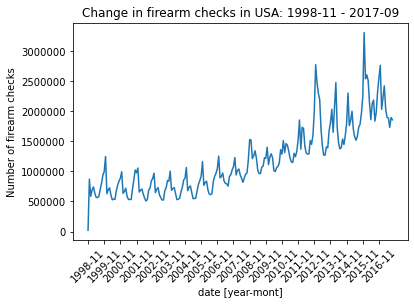

In [36]:
# plt.ticklabel_format(style='plain') is used to get rid of the scientific notation of Y axis (as suggested in https://stackoverflow.com/questions/68468307/how-do-i-change-le6-to-1000000-in-matplotlib)
plt.ticklabel_format(style='plain') 
plt.plot(df.index[:], df['totals'])
plt.xticks(df.index[::12], rotation = 45)
plt.title(f'Change in firearm checks in USA: {min_date} - {max_date}')
plt.xlabel('date [year-mont]')
plt.ylabel('Number of firearm checks');

Althouh, there are some month-to-month fluctuations, we can see that general trend of gun purchases in the USA is increasing.

Next, I want to further investigate the topic of gun purchase trends, I wanted to check in which states the change is the biggest between 1998 and 2017 and in which is the smallest.

In [37]:
# Chossing only the oldest date
min_date_df = gun_data.query('month == @min_date')

# Choosing only the columns needed for the analysis and renaming the totals column
min_date_df = min_date_df[['state', 'totals']]
min_date_df.rename(columns={'totals': 'totals_min_date'}, inplace=True)

# Chossing only the earliest date
max_date_df = gun_data.query('month == @max_date')

# Choosing only the columns needed for the analysis and renaming the totals column
max_date_df = max_date_df[['state', 'totals']]
max_date_df.rename(columns={'totals': 'totals_max_date'}, inplace=True)

# Merging those two dataframe
ratio_df = pd.merge(left=min_date_df, right=max_date_df, how='outer', on='state')
ratio_df.head()

,state,totals_min_date,totals_max_date
0,Alabama,1062.0,32019.0
1,Alaska,145.0,6303.0
2,Arizona,379.0,28394.0
3,Arkansas,589.0,17747.0
4,California,2101.0,123506.0


In [38]:
# Computing the change of the number of firearms check and adding it to the dataframe
ratio_df['ratio'] = ratio_df['totals_max_date']/ratio_df['totals_min_date']

In [39]:
print(ratio_df)

             state  totals_min_date  totals_max_date        ratio
0          Alabama           1062.0          32019.0    30.149718
1           Alaska            145.0           6303.0    43.468966
2          Arizona            379.0          28394.0    74.918206
3         Arkansas            589.0          17747.0    30.130730
4       California           2101.0         123506.0    58.784388
5         Colorado            622.0          35873.0    57.673633
6      Connecticut             80.0          12117.0   151.462500
7         Delaware             55.0           3502.0    63.672727
8          Florida            812.0          77390.0    95.307882
9          Georgia             62.0          35371.0   570.500000
10          Hawaii             28.0            948.0    33.857143
11           Idaho            176.0          14938.0    84.875000
12        Illinois             22.0         116449.0  5293.136364
13         Indiana            347.0          48524.0   139.838617
14        

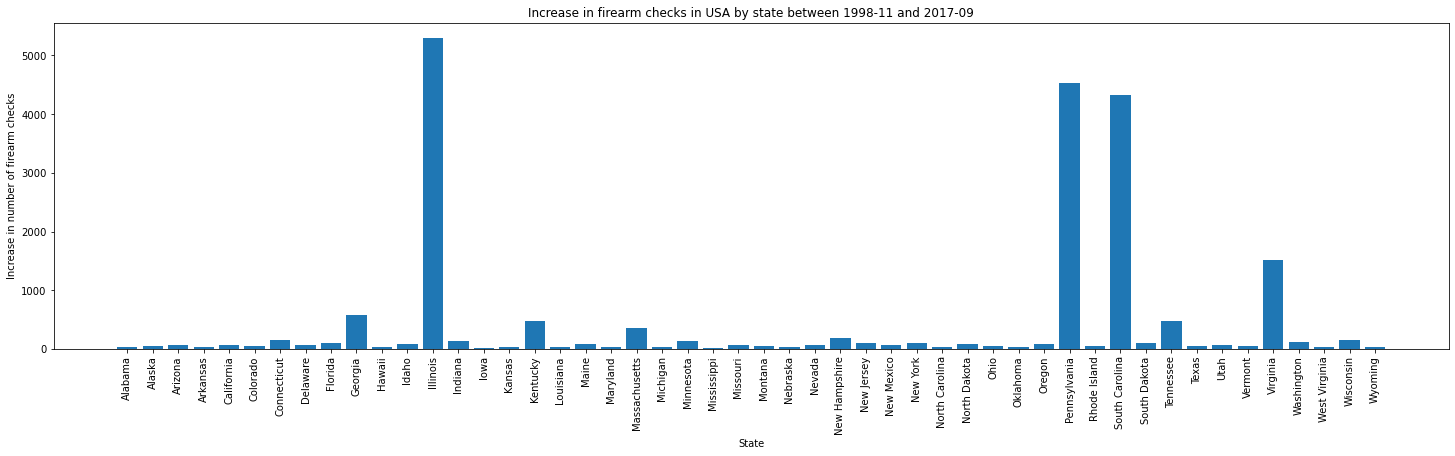

In [40]:
# plt.rcParams["figure.figsize"] = (25,6) is used to change the size of the plot (as suggested in https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)
plt.rcParams["figure.figsize"] = (25,6)
plt.bar(ratio_df['state'], ratio_df['ratio'])
plt.xticks(ratio_df['state'], rotation = 90)
plt.title(f'Increase in firearm checks in USA by state between {min_date} and {max_date}')
plt.xlabel('State')
plt.ylabel('Increase in number of firearm checks');

We can see that in all states ratio is positive, which means that number of firearms checks increases between 1998 and 2017 in all of the states. The biggest increases can be observed for Illinois, Pennsylvania and South Carolina. While the smallest increase can be observed for Iowa, Mississippi and Nebraska.

### Which states has the heighest rate of gun purchase per capita? And which has the lowest?

In [41]:
# There are data about population size in census from 2016, so I extract data only for this year from gun_data
df_1 = gun_data.loc[['2016-01','2016-02','2016-03','2016-04','2016-05', '2016-06','2016-07','2016-08','2016-09',
                   '2016-10', '2016-11','2016-12'],['state','totals']]
df_1.head()

,state,totals
month,,
2016-01,Alabama,73218.0
2016-01,Alaska,6085.0
2016-01,Arizona,31910.0
2016-01,Arkansas,20437.0
2016-01,California,220912.0


In [42]:
# Grouping by state and computing the sum for 2016
df_1 = df_1.groupby('state')['totals'].sum().to_frame()
df_1.head()

,totals
state,
Alabama,616947.0
Alaska,87647.0
Arizona,416279.0
Arkansas,266014.0
California,2377167.0


In [43]:
# Extract the population size data
population = census['Population_estimates,_July_1,_2016,__(V2016)'].to_frame()
population['state'] = population.index
population.rename(columns={'Population_estimates,_July_1,_2016,__(V2016)': 'population_size'}, inplace=True)
population.head()

,population_size,state
Alabama,4863300.0,Alabama
Alaska,741894.0,Alaska
Arizona,6931071.0,Arizona
Arkansas,2988248.0,Arkansas
California,39250017.0,California


In [44]:
# Merging those two data frame
df_1 = pd.merge(left=df_1, right=population, how='outer', on='state')
df_1.head()

,state,totals,population_size
0,Alabama,616947.0,4863300.0
1,Alaska,87647.0,741894.0
2,Arizona,416279.0,6931071.0
3,Arkansas,266014.0,2988248.0
4,California,2377167.0,39250017.0


In [45]:
# Computing firearms checks per capita in each state
df_1['per_capita'] = df_1['totals']/df_1['population_size']
df_1.head()

,state,totals,population_size,per_capita
0,Alabama,616947.0,4863300.0,0.126858
1,Alaska,87647.0,741894.0,0.118140
2,Arizona,416279.0,6931071.0,0.060060
3,Arkansas,266014.0,2988248.0,0.089020
4,California,2377167.0,39250017.0,0.060565


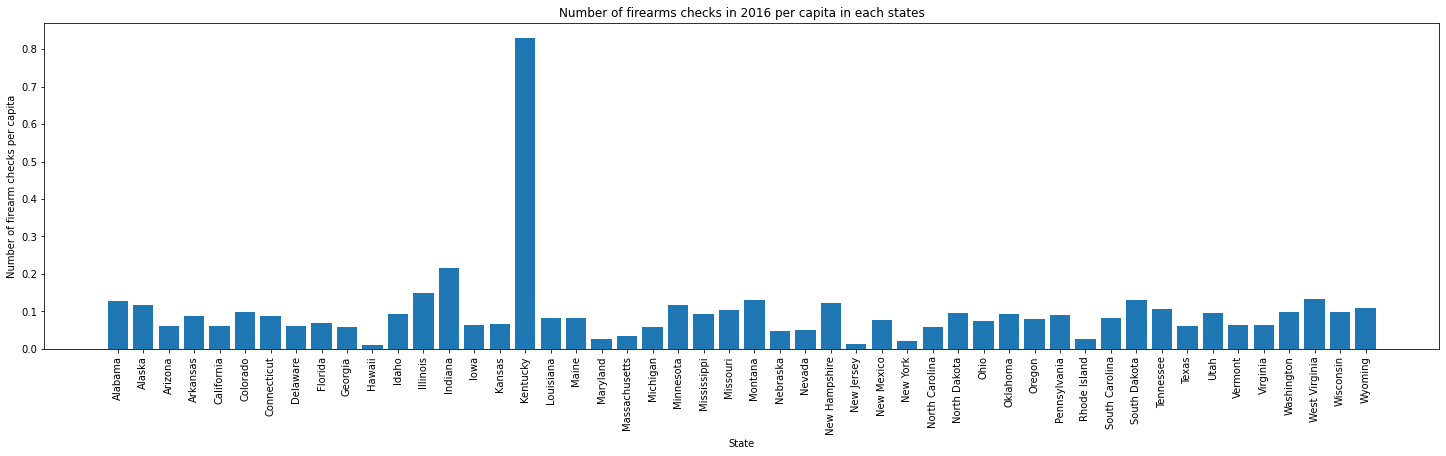

In [46]:
# plt.ticklabel_format(style='plain') is used to get rid of the scientific notation of Y axis (as suggested in https://stackoverflow.com/questions/68468307/how-do-i-change-le6-to-1000000-in-matplotlib)
plt.ticklabel_format(style='plain') 
plt.bar(df_1['state'], df_1['per_capita'])
plt.xticks(rotation = 90)
plt.title(f'Number of firearms checks in 2016 per capita in each states')
plt.xlabel('State')
plt.ylabel('Number of firearm checks per capita');

One of the states which stands out from the rest when it comes to number of firearms checks per capita is Kentucky. The lowest numbers of firearms per capita can be observed in Hawaii, New Jersey and New York.

### Are there any parameters from the census data associated with the number of the gun purchases?

In [47]:
# Because during analyses to adress this question scatter plots will be created multiple time, I decided to create funtion
# to plot the data (to avoid repetitive coding)
def scatter(y, y_label, df=df_1):
    plt.rcParams["figure.figsize"] = (10,6) 
    df.plot(x='totals', y=y, kind='scatter')
    plt.title(f'Correlation between {y} and numbers of firearms checks in the USA in 2016')
    plt.xlabel('Number of firearms check')
    plt.ylabel(y_label);

In [48]:
#I will use the data from df_1 prepared in the previous section, beacuse here analyzed parameters also consider year 2016
df_1.head()

,state,totals,population_size,per_capita
0,Alabama,616947.0,4863300.0,0.126858
1,Alaska,87647.0,741894.0,0.118140
2,Arizona,416279.0,6931071.0,0.060060
3,Arkansas,266014.0,2988248.0,0.089020
4,California,2377167.0,39250017.0,0.060565


**Is the percentage of people under 5 years old influnce the number of gun purchases?**

In [49]:
# Extract the census data
population = census['Persons_under_5_years,_percent,_July_1,_2016,__(V2016)'].to_frame()
population['state'] = population.index
population.rename(columns={'Persons_under_5_years,_percent,_July_1,_2016,__(V2016)': 'people_under_5_percentage'}, inplace=True)
population.head()

,people_under_5_percentage,state
Alabama,0.060,Alabama
Alaska,0.073,Alaska
Arizona,0.063,Arizona
Arkansas,0.064,Arkansas
California,0.063,California


In [50]:
# Merge this with df_1
df_1 = pd.merge(left=df_1, right=population, how='outer', on='state')
df_1.head()

,state,totals,population_size,per_capita,people_under_5_percentage
0,Alabama,616947.0,4863300.0,0.126858,0.060
1,Alaska,87647.0,741894.0,0.118140,0.073
2,Arizona,416279.0,6931071.0,0.060060,0.063
3,Arkansas,266014.0,2988248.0,0.089020,0.064
4,California,2377167.0,39250017.0,0.060565,0.063


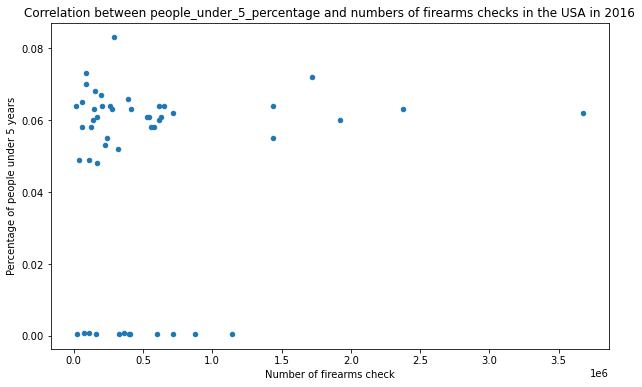

In [52]:
# Visualize
scatter(y='people_under_5_percentage', y_label='Percentage of people under 5 years',df=df_1)

The percentage of people under 5 years old seems not have the influence on number of gun purchases.

**Is the percentage of people under 65 years old influnce the number of gun purchases?**

In [53]:
# Extract the census data
population = census['Persons_65_years_and_over,_percent,__July_1,_2016,__(V2016)'].to_frame()
population['state'] = population.index
population.rename(columns={'Persons_65_years_and_over,_percent,__July_1,_2016,__(V2016)': 'people_over_65_percentage'}, inplace=True)
population.head()

,people_over_65_percentage,state
Alabama,0.161,Alabama
Alaska,0.104,Alaska
Arizona,0.169,Arizona
Arkansas,0.163,Arkansas
California,0.136,California


In [54]:
# Merge this with df_1
df_1 = pd.merge(left=df_1, right=population, how='outer', on='state')
df_1.head()

,state,totals,population_size,per_capita,people_under_5_percentage,people_over_65_percentage
0,Alabama,616947.0,4863300.0,0.126858,0.060,0.161
1,Alaska,87647.0,741894.0,0.118140,0.073,0.104
2,Arizona,416279.0,6931071.0,0.060060,0.063,0.169
3,Arkansas,266014.0,2988248.0,0.089020,0.064,0.163
4,California,2377167.0,39250017.0,0.060565,0.063,0.136


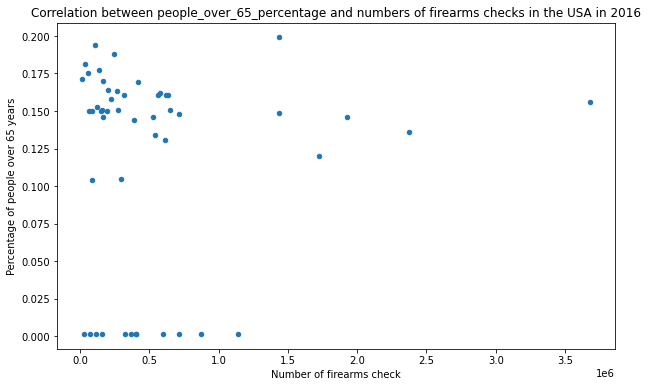

In [55]:
# Visualize
scatter(y='people_over_65_percentage', y_label='Percentage of people over 65 years',df=df_1)

The percentage of people over 65 years old seems not have the influence on number of gun purchases.

**Is the housing units influnce the number of gun purchases?**

In [56]:
# Extract the census data
population = census['Housing_units,__July_1,_2016,__(V2016)'].to_frame()
population['state'] = population.index
population.rename(columns={'Housing_units,__July_1,_2016,__(V2016)': 'housing_units'}, inplace=True)
population.head()

,housing_units,state
Alabama,2230185.0,Alabama
Alaska,310658.0,Alaska
Arizona,2961003.0,Arizona
Arkansas,1354762.0,Arkansas
California,14060525.0,California


In [57]:
# Merge this with df_1
df_1 = pd.merge(left=df_1, right=population, how='outer', on='state')
df_1.head()

,state,totals,population_size,per_capita,people_under_5_percentage,people_over_65_percentage,housing_units
0,Alabama,616947.0,4863300.0,0.126858,0.060,0.161,2230185.0
1,Alaska,87647.0,741894.0,0.118140,0.073,0.104,310658.0
2,Arizona,416279.0,6931071.0,0.060060,0.063,0.169,2961003.0
3,Arkansas,266014.0,2988248.0,0.089020,0.064,0.163,1354762.0
4,California,2377167.0,39250017.0,0.060565,0.063,0.136,14060525.0


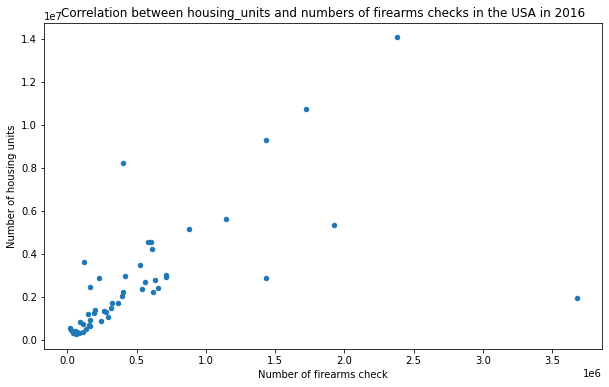

In [59]:
# Visualize
scatter(y='housing_units', y_label='Number of housing units',df=df_1)

Number of housing units seems to have the impact on number of gun purchases. 
The more densely built-up areas (more housing units), the greater the number of the firearms checks is.

**Is the total employment influnce the number of gun purchases?**

In [60]:
# The number of total employment in census data are for the 2015, so I need to extract the data for 2015 and group them
df_2 = gun_data.loc[['2015-01','2015-02','2015-03','2015-04','2015-05', '2015-06','2015-07','2015-08','2015-09',
                   '2015-10', '2015-11','2015-12'],['state','totals']]
df_2.head()

,state,totals
month,,
2015-01,Alabama,51119.0
2015-01,Alaska,5348.0
2015-01,Arizona,24620.0
2015-01,Arkansas,18184.0
2015-01,California,113292.0


In [61]:
# Grouping by state and computing the sum for 2016
df_2 = df_2.groupby('state')['totals'].sum().to_frame()
df_2.head()

,totals
state,
Alabama,737509.0
Alaska,85621.0
Arizona,331442.0
Arkansas,257346.0
California,1761079.0


In [62]:
# Extract the census data
population = census['Total_employment,_2015'].to_frame()
population['state'] = population.index
population.rename(columns={'Total_employment,_2015': 'total_employment'}, inplace=True)
population.head()

,total_employment,state
Alabama,1634391.0,Alabama
Alaska,267999.0,Alaska
Arizona,2295186.0,Arizona
Arkansas,1003113.0,Arkansas
California,14325377.0,California


In [63]:
# Merge this with df_2
df_2 = pd.merge(left=df_2, right=population, how='outer', on='state')
df_2.head()

,state,totals,total_employment
0,Alabama,737509.0,1634391.0
1,Alaska,85621.0,267999.0
2,Arizona,331442.0,2295186.0
3,Arkansas,257346.0,1003113.0
4,California,1761079.0,14325377.0


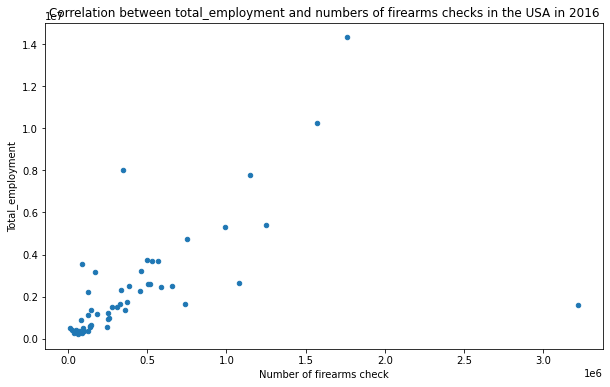

In [64]:
# Visualize
scatter(y='total_employment', y_label='Total_employment', df=df_2)

The total employment seems to have the impact on number of gun purchases. The bigger the total employment is, the greater the number of the firearms checks is.

<a id='conclusions'></a>
## Conclusions

Main conclusions drawn from the above analyzes:
<li>The trend of buying weapons in the USA is growing over time.</li>
<li>We can observe the increase in all the states. However in some states the this increase is bigger than in the others.</li>
<li>The number of firearms checks per capita is also state related, with the highest number in Kentucky. </li>
<li>Some of the demographic factors (reported in census) seems to have impact on the gun purchases. For example more densely built-up areas (more housing units) seems to have the greater the number of the firearms checks. Similar can be observed for the total employment. However, these correlation conclusions were drawn only from the visualizations prepared and were not supported by statistical tests.
    
The main limitations of this analyzes was the fact that gun data represents the firearm checks before gun purchase transactions and not the actual transactions and not all firearms checks can resulted in purchase transactions. So those trends can be a little bit different when it comes to gun purchases.

As for the conclusions that Americans are buying more and more weapons every year, it should be remembered that the law regarding the need to carry out the firearms checks can be changed over time and for example in 1995 some transactions may not have needed to be checked, and in 2015 they had to be. Similar note can be made when it comes to comparison by states.